<a href="https://colab.research.google.com/github/WSmithDR/espol-bootcamp-data_science/blob/18%2F03%2F2025-Laboratorio_1/Copia_de_Laboratorio_01_Regresi%C3%B3n_Lineal_CBDS_II.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Laboratorio 01 - Regresión Lineal
Coding Bootcamps ESPOL, Machine Learning and Predictions, Cohorte II

Instructores: Galo Castillo López


En este laboratorio implementaremos modelos de regresion lineal simple y múltiple, utilizando `scikit-learn`, para predecir la eficiencia de vehiculos.  La variable objetivo corresponde a las millas por galón (MPG) de combustible utilizados.

La consigna en este laboratorio es contestar todos los **TODOs** a lo largo del notebook.

In [ ]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [ ]:
df = pd.read_csv('./millas_por_galon.csv')

In [ ]:
df.head()

,nb_cilindros,desplazamiento,potencia,peso,aceleracion,anio,modeo,mpg
0,8,307.0,130.0,3504.0,12.0,70,"""chevrolet chevelle malibu""",18.0
1,8,350.0,165.0,3693.0,11.5,70,"""buick skylark 320""",15.0
2,8,318.0,150.0,3436.0,11.0,70,"""plymouth satellite""",18.0
3,8,304.0,150.0,3433.0,12.0,70,"""amc rebel sst""",16.0
4,8,302.0,140.0,3449.0,10.5,70,"""ford torino""",17.0


* nb_cilindros: la unidad de potencia del automóvil donde la gasolina se convierte en energía
* desplazamiento: desplazamiento del motor del auto
* potencia: tasa de rendimiento del motor en caballos de fuerza
* peso: el peso de un coche
* aceleracion: la aceleración del auto
* anio: anio en el que el auto fue lanzado al mercado
* origen: el origen del coche
* modelo: el nombre del auto
* mpg: Millaje/Millas por galón

In [ ]:
df.describe()

,nb_cilindros,desplazamiento,peso,aceleracion,anio,mpg
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,5.454774,193.425879,2970.424623,15.568090,76.010050,23.514573
std,1.701004,104.269838,846.841774,2.757689,3.697627,7.815984
min,3.000000,68.000000,1613.000000,8.000000,70.000000,9.000000
25%,4.000000,104.250000,2223.750000,13.825000,73.000000,17.500000
50%,4.000000,148.500000,2803.500000,15.500000,76.000000,23.000000
75%,8.000000,262.000000,3608.000000,17.175000,79.000000,29.000000
max,8.000000,455.000000,5140.000000,24.800000,82.000000,46.600000


### **######### Todo #########**
Cree scatter plots entre las variables independientes y la variable objetivo. Responda las siguientes preguntas basado en sus visualizaciones.

* A su criterio, ¿qué variable(s) predictora(s) muestra menos relación con la variable objetivo?
* ¿Qué variables predictoras muestran una relación lineal con la variable objetivo? ¿Hay alguna con una relación no lineal?
* Si usted crea dos modelos, uno utiliza la variable `desplazamiento` y otro la variable `aceleracion` como variables predictoras (regresión lineal simple), ¿qué signos poseen los parámetros que acompañan a la variable independiente del modelo? En otras palabras, el signo de $\theta_1$ en $y=\theta_1x + \theta_0$.

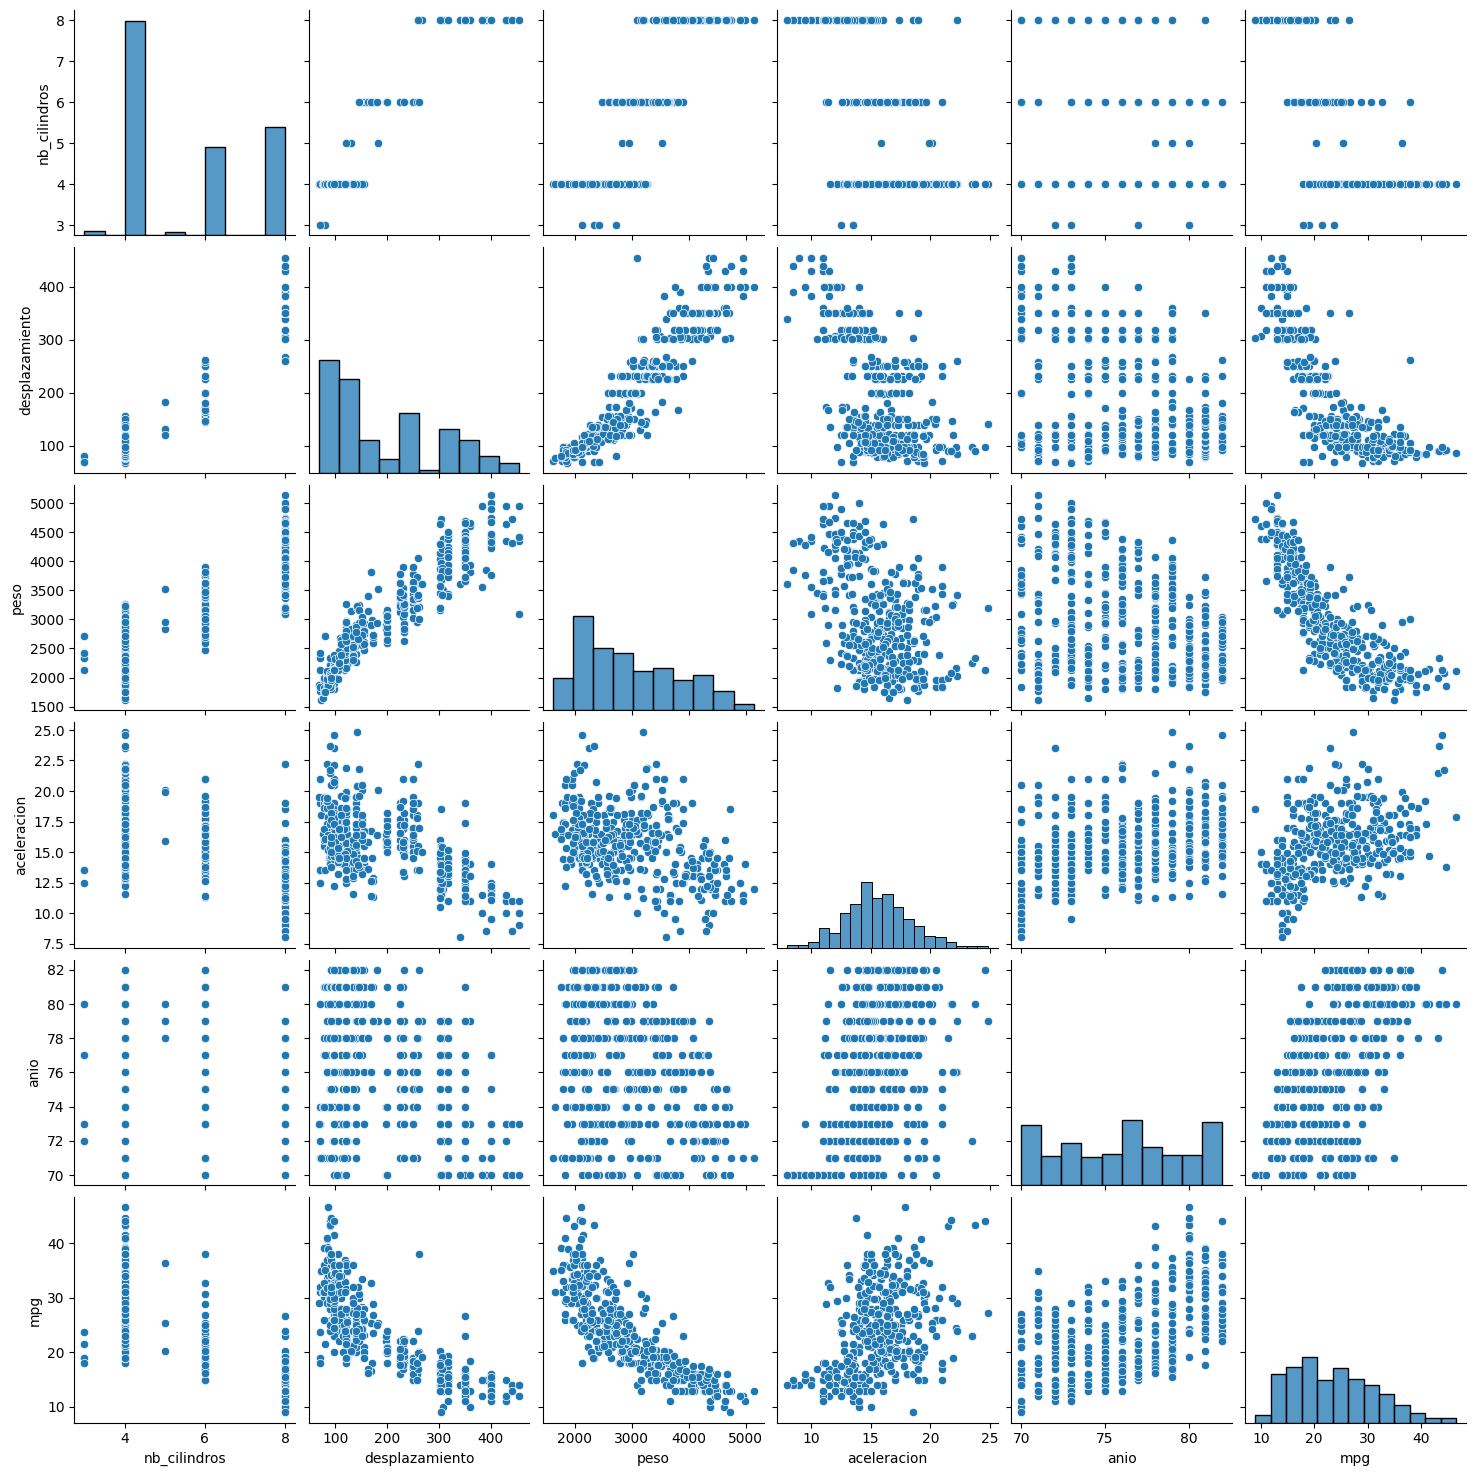

In [ ]:
sns.pairplot(df)

## Parte 1: Regresión Lineal Simple

En esta parte del laboratorio entrenaremos un modelo de Regresión Lineal con una sola variable predictora.

In [ ]:
from sklearn.model_selection import train_test_split
# Obtenemos nuestros datos de train y de test. Usaremos el 20% de los datos para test.

X = df[['nb_cilindros',	'desplazamiento',	'peso',	'aceleracion',	'anio']]

y = df['mpg']

X_train_tmp, X_test, y_train_tmp, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

X_train_tmp, X_test, y_train_tmp, y_test


(     nb_cilindros  desplazamiento    peso  aceleracion  anio
 3               8           304.0  3433.0         12.0    70
 18              4            97.0  2130.0         14.5    70
 376             4            91.0  2025.0         18.2    82
 248             4            91.0  1800.0         16.4    78
 177             4           115.0  2694.0         15.0    75
 63              8           400.0  4385.0         12.0    72
 246             4            78.0  1985.0         19.4    78
 352             4            98.0  2380.0         20.7    81
 108             4            97.0  2279.0         19.0    73
 90              8           429.0  4952.0         11.5    73
 231             8           400.0  4325.0         12.2    77
 334             3            70.0  2420.0         12.5    80
 118             4           116.0  2158.0         15.5    73
 218             4            79.0  1825.0         18.6    77
 210             6           156.0  2930.0         15.5    76
 378    


### **######### Todo #########**

En este laboratorio usaremos hold-out validation, considerando el 20% de los datos de entrenamiento obtenidos previamente para validación. A partir de `X_train_tmp` y `y_train_tmp` obtenga  `X_train`, `X_val`, `y_train` y `y_val`. Considere utilizar el método `train_test_split`.

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X_train_tmp, y_train_tmp, test_size=0.20, random_state=42)

In [ ]:
######### TODO #########
### Seleccione la variable que de acuerdo a usted puede modelar mejor la eficiencia.
### La variable predictor_vars debe ser una lista con el nombre de una variable.
### Escribe tu código debajo en 1 línea
nom_variable_1 = 'peso'

predictor_vars = [nom_variable_1]

In [ ]:
import sklearn
from sklearn.linear_model import LinearRegression

# Entrenamos nuestro modelo usando la variable que elegimos.
model_simple = LinearRegression()
model_simple.fit(X=X_train[predictor_vars], y=y_train)

LinearRegression()

In [ ]:
######### TODO #########
### Obtenga las predicciones de su modelo sobre X_val y almacénelas en
# la variable y_simple_pred. Use el modelo model_simple que entrenamos anteriormente.
### Escribe tu código debajo en 1 línea
y_simple_pred = model_simple.predict(X_val[predictor_vars])

In [ ]:
type(y_simple_pred)

numpy.ndarray

In [ ]:
y_simple_pred

array([27.9796764 , 26.83681114, 13.44031103, 18.12530174,  8.59637878,
       25.94371113, 15.04486358, 25.30037638, 22.17452635, 20.49428736,
       31.58235101, 29.84156286, 32.07431288, 22.91625348, 21.23601448,
       17.48953564, 29.51611116, 24.0515501 , 28.44136369, 25.22468994,
       23.2114306 , 26.39782978, 23.63527467, 22.59837042, 26.49622215,
       29.27391455, 21.60687804, 31.2039188 , 24.08939332, 10.26148049,
       28.40352047, 12.88780001, 25.48959248, 29.76587642, 21.78095686,
       28.75924675, 27.6542247 , 15.07513816, 17.88310513, 17.45926106,
       28.06293149, 31.0147027 , 28.70626624, 33.86808154, 31.05254592,
       32.45274508, 30.97685948, 25.48959248, 13.7279195 , 29.64477811,
       32.75549085, 14.6361568 , 24.96735604, 24.12723654, 21.51605431,
       31.21905609, 26.28430012, 21.0846416 , 19.89636447, 17.0883975 ,
       17.65604581, 29.99293574, 28.66842302, 14.21988137])

In [ ]:
y_simple_pred.size

64

In [ ]:
X_val.shape

(64, 5)

In [ ]:
######### TODO #########
### Obtenga la evaluación de su modelo usando las siguientes tres métricas:
# MAE, MSE, R2 (coeficiente de determinación).
# Revise la documentación de sklearn: https://scikit-learn.org/stable/modules/model_evaluation.html
from sklearn.metrics import ???

# Cálculo de métricas
mae = ???
mse = ???
r2 = ???

# Resultados
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R^2 Score: {r2:.2f}")

SyntaxError: invalid syntax (<ipython-input-19-2839fac9e9e0>, line 5)

### **######### Todo #########**
Interprete el resultado obtenido sobre el rendimiento de su modelo.

## Parte 2: Regresión Lineal Múltiple

En esta parte del laboratorio entrenaremos un modelo de Regresión Lineal con dos variables predictoras.

In [ ]:
######### TODO #########
### Seleccione otra variable que de acuerdo a usted puede modelar adecuadamente la eficiencia.
### La variable predictor_vars_2 debe será una lista con los nombres de las 2 variables seleccionadas.
### Escribe tu código debajo en 1 línea
nom_variable_2 = ???

predictor_vars_2 = [nom_variable_1, nom_variable_2]

In [ ]:
model_multiple_1 = LinearRegression()
model_multiple_1.fit(X=X_train[predictor_vars_2], y=y_train)

In [ ]:
# Obtenemos nuevamente las predicciones del modelo nuevo
y_multiple_pred_1 = model_multiple_1.predict(X_val[predictor_vars_2])

In [ ]:
######### TODO #########
### Obtenga la evaluación de su modelo usando las siguientes tres métricas:
# MAE, MSE, R2 (coeficiente de determinación).
# Revise la documentación de sklearn: https://scikit-learn.org/stable/modules/model_evaluation.html

mae = ???
mse = ???
r2 = ???

# Resultados
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R^2 Score: {r2:.2f}")

### **######### Todo #########**
Interprete el resultado obtenido sobre el rendimiento de su modelo. Compare el rendimiento del nuevo modelo con el primer modelo evaluado. ¿Cambió el rendimiento? ¿Mejoró o empeoró? ¿Por qué?

Ahora entrenaremos un nuevo modelo con los datos escalados.

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler_1 = MinMaxScaler()
scaler_1.fit(X_train[predictor_vars_2])

X_train_scaled = scaler_1.transform(X_train[predictor_vars_2])

In [ ]:
# Entrenamos el modelo
model_multiple_2 = LinearRegression()
model_multiple_2.fit(X=X_train_scaled, y=y_train)

In [ ]:
# Predecimos y evaluamos el nuevo modelo
y_multiple_pred_2 = model_multiple_2.predict(X_val[predictor_vars_2])

######### TODO #########
### Obtenga la evaluación de su modelo usando las siguientes tres métricas:
# MAE, MSE, R2 (coeficiente de determinación).
# Revise la documentación de sklearn: https://scikit-learn.org/stable/modules/model_evaluation.html

mae = ???
mse = ???
r2 = ???

# Resultados
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R^2 Score: {r2:.2f}")


Mean Absolute Error (MAE): 73068.91
Mean Squared Error (MSE): 5757150945.11
R^2 Score: -82795054.43


### **######### Todo #########**

Interprete los resultaods obtenidos. ¿Por qué el error es muy alto?. Escriba recomendaciones para evitar obtener errores altos.

Ahora escalaremos los datos del conjunto de validación.

In [ ]:
X_val_scaled = scaler_1.transform(X_val[predictor_vars_2])

In [ ]:
# Predecimos y evaluamos el nuevo modelo
y_multiple_pred_3 = model_multiple_2.predict(X_val_scaled)

######### TODO #########
### Obtenga la evaluación de su modelo usando las siguientes tres métricas:
# MAE, MSE, R2 (coeficiente de determinación).
# Revise la documentación de sklearn: https://scikit-learn.org/stable/modules/model_evaluation.html

mae = ???
mse = ???
r2 = ???

# Resultados
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R^2 Score: {r2:.2f}")


### **######### Todo #########**

* Interprete los resultaods obtenidos. ¿Qué ocurrió ahora con respecto a la anterior evaluación?

### **######### Todo #########**

* Escriba debajo el código necesario para entrenar nuevos modelos (al menos 1 adicional) utilizando tantas variables desee. Encuentre sobre los datos de validación cuál modelo obtiene el mejor rendimiento.
* Interprete los resultados obtenidos.
* Utilizando las predicciones de su mejor modelo, realice un scatter plot de Valor real vs Predicciones (eje horizontal corresponde al valor que predice su modelo sobre los registros de validación y el eje vertical son sus respectivos valores reales de MPG. ¿Cómo deberían de visualizarse los datos en el escenario óptimo (un modelo perfecto)?

### **######### Todo #########**

* Escriba debajo el código necesario para evaluar el mejor modelo obtenido con los datos de prueba.
* Interprete los resultados obtenidos.